In [2]:
# First we need to import all of the packages we will be using!
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.stats import linregress

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Slope of the tangent line: 2.987387960887849


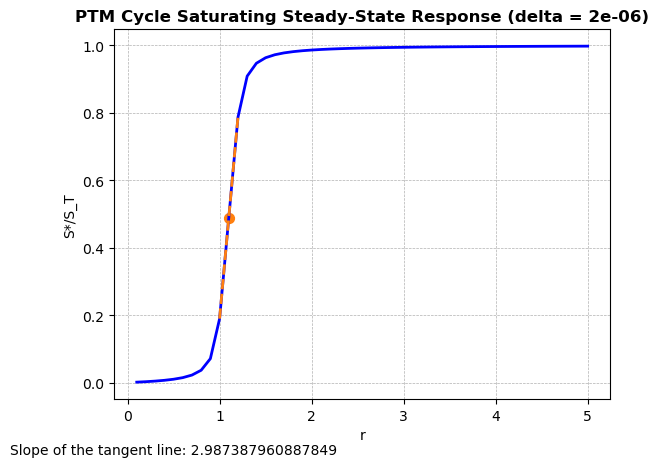

In [35]:
# Second model: includes synthesis and degradation
# This is the definition of our system of ODEs for the model
def second_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, KS, Sstar, PSstar, K, P
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    K = states[4]
    P = states[5]
    # PUT YOUR ODES below!!!
    # Hint: copy the ODEs from first_model and modify them to include synthesis and degradation
    
    S_prime = -k_plus*S*K + k_minus*KS + k_cat*PSstar             + Q - S*delta
    KS_prime = k_plus*S*K - k_minus*KS - k_cat*KS                 - KS*delta
    Sstar_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*KS     - Sstar*delta
    PSstar_prime = k_plus*Sstar*P - k_minus*PSstar - k_cat*PSstar - PSstar*delta
    K_prime = -k_plus*S*K + k_minus*KS + k_cat*KS                 + KS*delta
    P_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*PSstar     + PSstar*delta
    
    
    # your ODEs go above!
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    return states_prime

# STEADY-STATE responses of the second model
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_cat = 9.9
k_minus = 0.1
k_plus = 1
delta = 2e-6 # Default: 2e-5

# First, define our initial conditions
# These are going to be the same for value of 'K_0'
S_0 = 1000 # This is the variable you change to change saturation!
KS_0 = 0.0
Sstar_0 = 0.0
PSstar_0 = 0.0
P_0 = 0.001

Q = delta*S_0 # This line handily calculates the value of 'Q' that we need


# This is the same as we had above for our first model
K_values = np.linspace(0.0001, 0.005)
Sstar_results = []
r_values = []
for K_0 in K_values:
    states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
    t = np.linspace(0,2000000,2000)
    solution = odeint(second_model,states_0,t)
    r = k_cat*K_0 / (k_cat*P_0)
    r_values.append(r)
    Sstar_results.append(solution[1999,2]/S_0)
    
# TESTING
# Run this once for unsaturated, then change the block above and make a graph for saturated

# Define the r value
r_val = 1.1

# Find the index of the closest r value in r_values
index = (np.abs(np.array(r_values) - r_val)).argmin()

# Get the corresponding Sstar_result
y1 = Sstar_results[index]

# Define the line function for the tangent
def line(x, x1, y1):
    return (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1]) * (x - r_values[index]) + y1


xrange = np.linspace(r_values[index]-.1, r_values[index]+.1, 10)

plt.plot(r_values,Sstar_results,'b-',linewidth=2)
plt.xlabel('r')
plt.ylabel('S*/S_T')
plt.title(f'PTM Cycle Saturating Steady-State Response (delta = {delta})', weight = 'bold')
plt.scatter(r_val, y1, color='C1', s=50)
plt.plot(xrange, line(xrange, r_val, y1), 'C1--', linewidth = 2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the slope of the tangent line
tangent_slope = (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1])
print("Slope of the tangent line:", tangent_slope)

plt.text(0.5, -0.2, f'Slope of the tangent line: {tangent_slope}', ha='center', va='center')
plt.show()

/Users/timothyliu/anaconda3/envs/M178/lib/python3.12/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Slope of the tangent line: 4.999988258410032


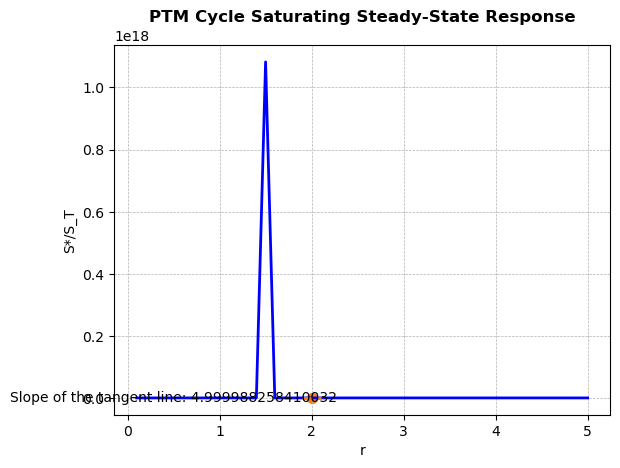

In [40]:
# Second model: includes synthesis and degradation
# This is the definition of our system of ODEs for the model
def second_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, KS, Sstar, PSstar, K, P
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    K = states[4]
    P = states[5]
    # PUT YOUR ODES below!!!
    # Hint: copy the ODEs from first_model and modify them to include synthesis and degradation
    
    S_prime = -k_plus*S*K + k_minus*KS + k_cat*PSstar             + Q - S*delta
    KS_prime = k_plus*S*K - k_minus*KS - k_cat*KS                 - KS*delta
    Sstar_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*KS     - Sstar*delta
    PSstar_prime = k_plus*Sstar*P - k_minus*PSstar - k_cat*PSstar - PSstar*delta
    K_prime = -k_plus*S*K + k_minus*KS + k_cat*KS                 + KS*delta
    P_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*PSstar     + PSstar*delta
    
    
    # your ODEs go above!
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    return states_prime


# STEADY-STATE responses of the second model
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_cat = 9.9
k_minus = 0.1
k_plus = 1
delta = 2e-5 # This is the value of delta we will use

# First, define our initial conditions
# These are going to be the same for value of 'K_0'
S_0 = 1000 # This is the variable you change to change saturation!
KS_0 = 0.0
Sstar_0 = 0.0
PSstar_0 = 0.0
P_0 = 0.001

Q = delta*S_0 # This line handily calculates the value of 'Q' that we need


# This is the same as we had above for our first model
K_values = np.linspace(0.0001, 0.005)
Sstar_results = []
r_values = []
for K_0 in K_values:
    states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
    t = np.linspace(0,2000000,2000)
    solution = odeint(second_model,states_0,t)
    r = k_cat*K_0 / (k_cat*P_0)
    r_values.append(r)
    Sstar_results.append(solution[1999,2]/S_0)
    
# PLOT your steady-state results
# Run this once for unsaturated, then change the block above and make a graph for saturated

#Get slope at middle point:

#r_val = 2.9
#r_val /= 50

# Define the r value
r_val = 2

# Find the index of the closest r value in r_values
index = (np.abs(np.array(r_values) - r_val)).argmin()

# Get the corresponding Sstar_result
y1 = Sstar_results[index]

# Define the line function for the tangent
def line(x, x1, y1):
    return (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1]) * (x - r_values[index]) + y1


xrange = np.linspace(r_values[index]-.1, r_values[index]+.1, 10)

plt.plot(r_values,Sstar_results,'b-',linewidth=2)
plt.xlabel('r')
plt.ylabel('S*/S_T')
plt.title('PTM Cycle Saturating Steady-State Response', weight = 'bold')
plt.scatter(r_val, y1, color='C1', s=50)
plt.plot(xrange, line(xrange, r_val, y1), 'C1--', linewidth = 2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the slope of the tangent line
tangent_slope = (Sstar_results[index+1] - Sstar_results[index-1]) / (r_values[index+1] - r_values[index-1])
print("Slope of the tangent line:", tangent_slope)

plt.text(0.5, -0.2, f'Slope of the tangent line: {tangent_slope}', ha='center', va='center')
plt.show()